In [1]:
suppressMessages({
    require(data.table, quietly=TRUE)
    require(ggplot2, quietly=TRUE)
    require(magrittr, quietly=TRUE)
})

In [2]:
measurements <- fread("measurements.tsv", stringsAsFactors=TRUE)
measurements %>% summary

 src     dst         trial        bps           
 ap:60   ap:60   Min.   :1   Min.   :  4563024  
 eu:60   eu:60   1st Qu.:1   1st Qu.:115314184  
 us:60   us:60   Median :2   Median :157283878  
                 Mean   :2   Mean   :174744422  
                 3rd Qu.:3   3rd Qu.:275250229  
                 Max.   :3   Max.   :346040455  

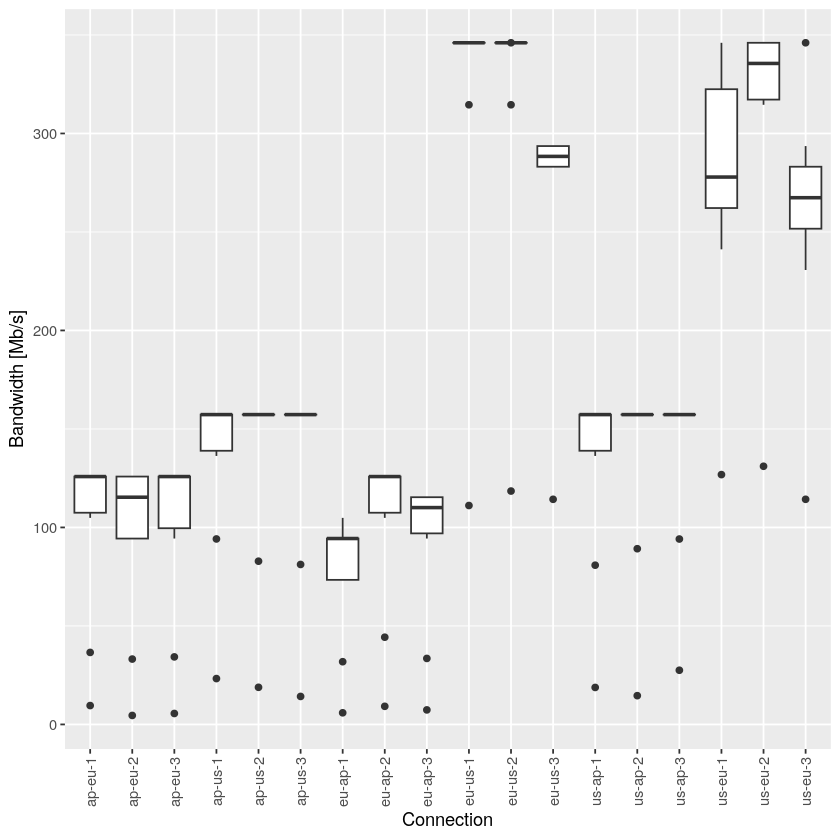

In [3]:
ggplot(
    measurements[, .(`Connection`=factor(paste(`src`,`dst`,`trial`,sep="-")), `Bandwidth [Mb/s]`=`bps`/1e6)],
    aes(x=`Connection`, y=`Bandwidth [Mb/s]`)
) +
    geom_boxplot() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5))

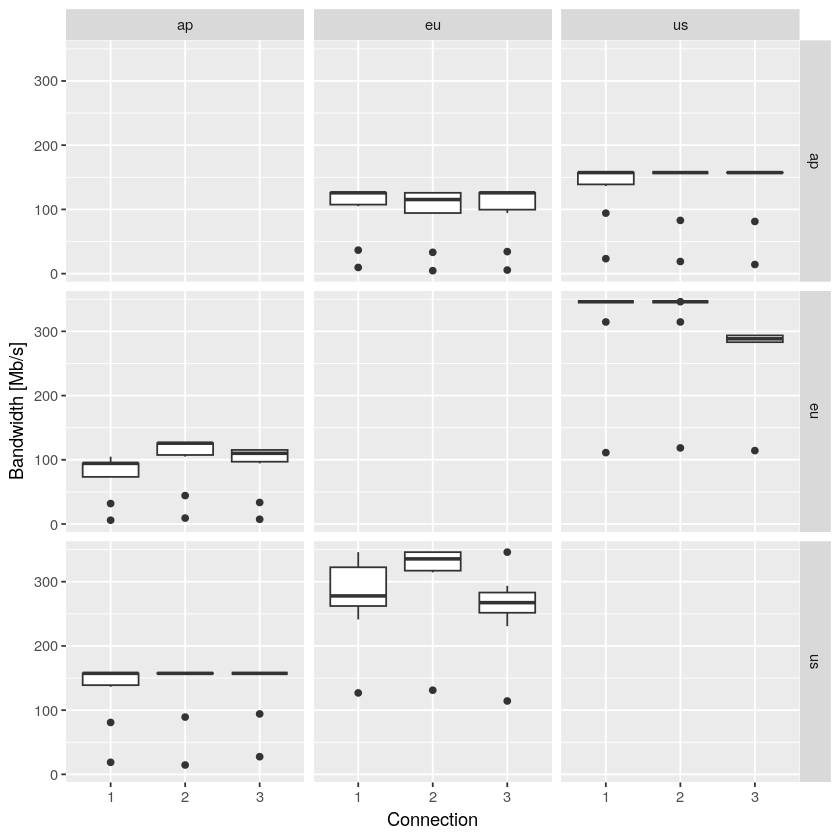

In [4]:
ggplot(
    measurements[, .(`src`, `dst`, `Connection`=factor(`trial`), `Bandwidth [Mb/s]`=`bps`/1e6)],
    aes(x=`Connection`, y=`Bandwidth [Mb/s]`)
) +
    geom_boxplot() +
    facet_grid(`src` ~ `dst`)

In [5]:
ggsave("bm-bw.png", units="in", dpi=150, width=8, height=6)